/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-02 19:01:52.481391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-02 19:01:52.482029: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-03-02 19:01:52.915655: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-02 19:01:53.186136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.1445 - accuracy: 0.9550

2023-03-02 19:02:08.157111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.1443 - accuracy: 0.9551 - val_loss: 0.0440 - val_accuracy: 0.9861
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0277 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0328 - val_accuracy: 0.9899
Time taken: 79.23197102546692 seconds


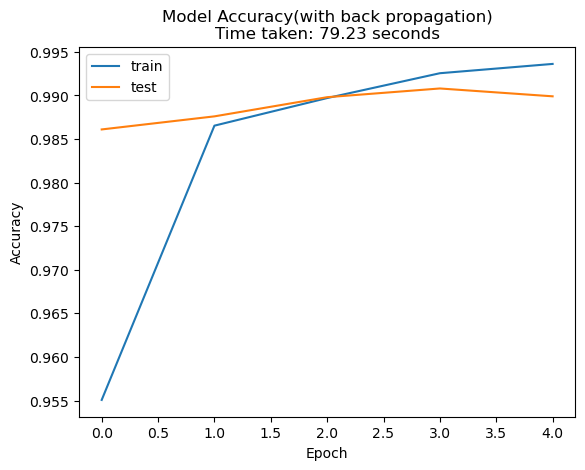

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import time
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data for use in a convolutional neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Define the model
model = tf.keras.models.Sequential([
    # First network: 3 convolutional layers with maxpooling layers in between
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    # Second network: 1 dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and record the time taken
start_time = time.time()
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)
end_time = time.time()
print("Time taken:", end_time - start_time, "seconds")

# Plot the accuracy graph with time taken
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy(with back propagation)\nTime taken: {:.2f} seconds'.format(end_time - start_time))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
